# Biodiversity in National Parks

### Author: Alexander K.

## Overview
This project interprets data from the National Parks Service about biodiversity and endangered species in different parks.


## Project Goals
The goals of this project are to perform a data analysis of the conservation statuses of endangered species, investigate patterns related to the types of species that become endangered, and visualize the data to identify trends and distributions of endangered species across different national parks

Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


## Actions

- analyze data;
- clean up the datasets;
- visualize the data using graphs and charts;
- seek to answer the questions;
- making conclusions based on the analysis.

## Data

There are two datasets:
1. Species data - contains information about different species, including their conservation status.
2. Observations data - contains records of species observed in various national parks, including the date and location of the observation.

## Analysis

In this section, we will employ descriptive statistics and data visualization methods to gain a deeper understanding of the data. Statistical analysis will also be conducted to determine if the observed species are statistically significant. Some of the key metrics that will be calculated include:
1. Frequency distributions
1. Counts
1. Relationships between species
1. Conservation status of species
1. Observations of species in parks.


In [88]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('max_colwidth', 0)

In [90]:
# load the datasets

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## Exploratory Data Analysis (EDA)

### Species and Conservation Status

In [91]:
# inspecting species dataset
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [92]:
# inspecting species dataset
print(f"The shape of the species dataset is - {species.shape}")
print()
print(species.info())

The shape of the species dataset is - (5824, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [93]:
species.columns.to_list()

['category', 'scientific_name', 'common_names', 'conservation_status']

There are 5824 rows and 4 columns in the species dataset:
* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

In [94]:
# count the unique species in the dataset
unique_species = species['scientific_name'].nunique()
print(f"There are {unique_species} unique species in the dataset.")

There are 5541 unique species in the dataset.


In [95]:
# list of category of species
categories = species['category'].unique().tolist()
print(f"The categories of species in the dataset are:\n{categories}")


The categories of species in the dataset are:
['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


In [96]:
# count species by category
species.groupby('category').size().reset_index(name='count')

,category,count
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [97]:
# looking to conservation_status column
print(f"There are {species['conservation_status'].nunique()} unique conservation statuses in the dataset.")
print(f"The unique conservation statuses are:\n{species['conservation_status'].unique().tolist()}")

There are 4 unique conservation statuses in the dataset.
The unique conservation statuses are:
[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

In [98]:
# count nan values in conservation_status
nan_conservation_status = species['conservation_status'].isna().sum()
print(f"There are {nan_conservation_status} species have no protected status.")

There are 5633 species have no protected status.


In [99]:
# fill nan values as 'No Intervention'
species['conservation_status'].fillna('No Intervention', inplace=True)

In [100]:
species.groupby('conservation_status').size().reset_index(name='count').sort_values(by='count', ascending=False).set_index('conservation_status')

,count
conservation_status,
No Intervention,5633
Species of Concern,161
Endangered,16
Threatened,10
In Recovery,4


### Handling the duplicates

In [101]:
# count scientific_name values
sci_names_count= species.groupby(['scientific_name']).size().reset_index(name='count').sort_values(by='count', ascending=False).set_index('scientific_name')
sci_names_count.head(10)

,count
scientific_name,
Canis lupus,3
Holcus lanatus,3
Puma concolor,3
Myotis lucifugus,3
Castor canadensis,3
Procyon lotor,3
Streptopelia decaocto,3
Hypochaeris radicata,3
Columba livia,3


It seems, that there are several scientific names with the same value. We should investigate deeper this issue by checking for duplicates in the dataset.

In [102]:
scientific_name = 'Canis lupus'
filt_specie = (species['scientific_name'] == scientific_name)
species[filt_specie]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


For example, we can check the number of records of `Canis lupus` (Gray Wolf one of the common names) in the dataset. There are 3 values for this species at `scientific_name` column with different conservation statuses and common names.
For further investigation, we will remove duplicates in the `scientific_name` column so that the most important `conservation_status` remains and simultaneously combine all `common_names`.

In [141]:
# set priority of conservation status
priority = {
    'No Intervention': 0,
    'In Recovery': 1,
    'Species of Concern': 2,
    'Threatened': 3,
    'Endangered': 4
}

# create conservation priority column and sort species by priority
species['conservation_priority'] = species['conservation_status'].map(priority)
species_sort_priority = species.sort_values(by='conservation_priority', ascending=False)
species_sort_priority.head()

,category,scientific_name,common_names,conservation_status,conservation_priority
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,4
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,4
4601,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,4
4505,Bird,Gymnogyps californianus,California Condor,Endangered,4
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,4


In [104]:
# create a function to remove punctuation in text
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# group by scientific_name and aggregate unique common names
# remove_punctuation in each common name > 
# join common names by ', ' in scientific_name group > 
# split them by ', ' into a list > 
# leave only unique values with set >
# final join with ', '
names_agg = species.groupby('scientific_name')\
    ['common_names'].apply(lambda x: ', '.join(set((', '.join(remove_punctuation(x).dropna())).split(', '))))\
        .reset_index()

# check the result
names_agg[(names_agg['scientific_name'] == scientific_name)]

,scientific_name,common_names
804,Canis lupus,"Gray Wolf, Wolf"


In [105]:
# create clean species dataset
# drop common_names column
# left merge species_sort_priority with names_agg
# drop conservation_priority, drop duplicates by scientific_name
species_clean = species_sort_priority.drop(columns=['common_names'])\
    .merge(names_agg, on='scientific_name', how='left')\
    .drop(columns=['conservation_priority'])\
    .drop_duplicates(subset=['scientific_name'])

species_clean[species_clean['scientific_name'] == scientific_name]

,category,scientific_name,conservation_status,common_names
0,Mammal,Canis lupus,Endangered,"Gray Wolf, Wolf"


In [142]:
species_clean.shape

(5541, 4)

Finally, we have a clean dataset `species_clean` with unique 5,541 species, highest conservation status and all unique common names in a single column.

In [144]:
# count species by category one more time
species_clean.groupby('category').size().reset_index(name='count').set_index('category')


,count
category,
Amphibian,79
Bird,488
Fish,125
Mammal,176
Nonvascular Plant,333
Reptile,78
Vascular Plant,4262


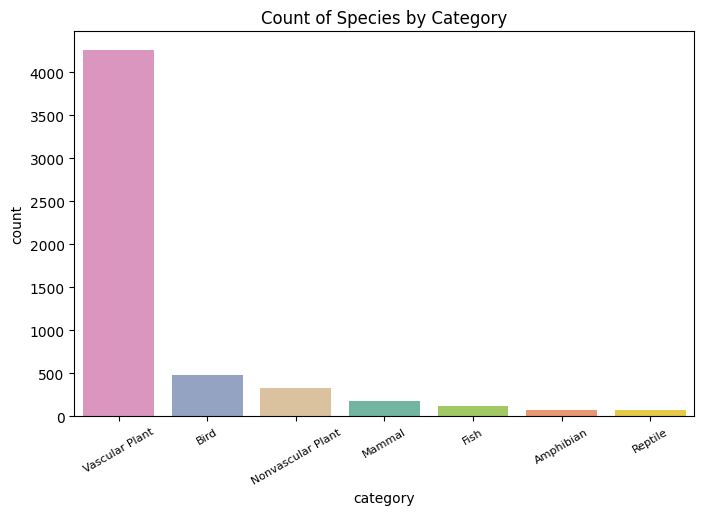

In [147]:
# creating a countplot for the 'category' column
plt.figure(figsize=(8, 5), frameon=True)
sns.countplot(data=species_clean, x='category', hue='category', palette='Set2', order=species_clean['category'].value_counts().index, legend=False)
plt.title('Count of Species by Category')
plt.xticks(rotation=30, fontsize=8)
plt.show()

In [150]:
# count species by conservation status one more time
species_clean.groupby('conservation_status')\
    .size()\
    .reset_index(name='count')\
    .set_index('conservation_status')\
    .sort_values(by='count', ascending=False)

,count
conservation_status,
No Intervention,5362
Species of Concern,151
Endangered,15
Threatened,10
In Recovery,3


In [111]:
# creating the data frame with only conservation species
conservation_species = species_drop[~species_drop['conservation_status'].isna()].sort_values('scientific_name')
conservation_species.shape


(5541, 4)

In [112]:
species_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   category               5541 non-null   object
 1   scientific_name        5541 non-null   object
 2   conservation_status    5541 non-null   object
 3   conservation_priority  5541 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 216.4+ KB


In [115]:
# count the total number of conservation species
species_drop['conservation_status'].value_counts()

conservation_status
No Intervention       5362
Species of Concern    151 
Endangered            15  
Threatened            10  
In Recovery           3   
Name: count, dtype: int64

In [116]:
# select category and conservation status, group by conservation_status, and count category status
# using .unstack() to pivot the table; fill missing values with 0
conservationCategory = species_drop.groupby('conservation_status')[['category', 'conservation_status']].value_counts().unstack().fillna(0).astype(int)
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0
No Intervention,72,413,114,146,328,73,4216
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,4,2,0,0,2


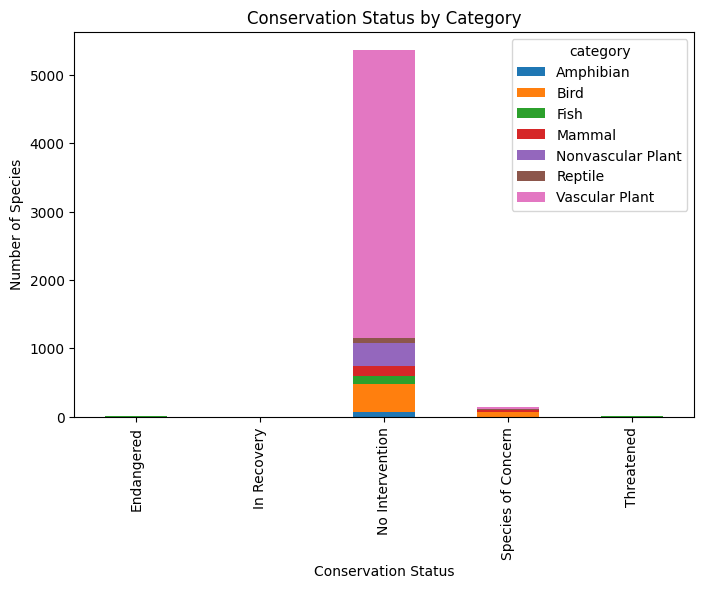

In [117]:
# creating stacked bar plot for conservation status by category
conservationCategory.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Conservation Status by Category')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()

### Insights from species data

The species dataset contains information about animal and plant species living in U.S. national parks, including their conservation status.

The data shows that 179 out of 5,541 species have been assigned some form of conservation status. This represents approximately 3.23% of all species in the dataset.

The most prevalent category is Vascular Plants, with a total of 4,262 species. Other notable groups include Birds, Nonvascular Plants, and Mammals. The smallest categories are Reptiles and Amphibians.

Around 200 species have been assigned a conservation status. The most common status is Species of Concern, where birds make up the largest share. Vascular Plants and Mammals also represent a significant portion of this category.

Among endangered species, mammals are the most represented group, followed by birds and fish.

The In Recovery status applies to only 3 species across all national parks. The are three bird species.

If environmental conditions remain unchanged in the coming years, several species of Amphibians, Mammals, Fish, and Vascular Plants may move into the endangered category.

### Observations data

In [118]:
# inspecting observations dataset
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [119]:
# inspecting observations dataset
print(f"The shape of the observations dataset is - {observations.shape}")
print()
print(observations.info())

The shape of the observations dataset is - (23296, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [120]:
observations.columns.to_list()

['scientific_name', 'park_name', 'observations']

There are 23296 rows and 3 columns in the observations dataset:
* scientific_name - the scientific name of each species
* park_name - park where species were found
* observations - the number of times each species was observed at park

In [121]:
# base check for duplicates
observations.duplicated().any()

True

In [122]:
# checking duplicates in observations dataset
observations[observations.duplicated(subset=['scientific_name', 'park_name'], keep=False)] \
	.sort_values(by='scientific_name') \
	.head(10)

,scientific_name,park_name,observations
792,Agrostis capillaris,Great Smoky Mountains National Park,84
7750,Agrostis capillaris,Yosemite National Park,182
17735,Agrostis capillaris,Yosemite National Park,140
4864,Agrostis capillaris,Bryce National Park,105
6166,Agrostis capillaris,Yellowstone National Park,241
17428,Agrostis capillaris,Great Smoky Mountains National Park,97
3993,Agrostis capillaris,Bryce National Park,103
10379,Agrostis capillaris,Yellowstone National Park,267
17535,Agrostis gigantea,Yosemite National Park,128
13907,Agrostis gigantea,Yosemite National Park,148


In [123]:
# count duplicates
observations.duplicated(subset=['scientific_name', 'park_name'], keep='last').sum()

1132

In [124]:
# agregating observations by scientific_name and park_name
# summing the observations for each group
observations_clean = observations.groupby(['scientific_name', 'park_name'], as_index=False)['observations'].sum()
print(f"The shape of the cleaned observations dataset is - {observations_clean.shape}")

The shape of the cleaned observations dataset is - (22164, 3)


In [125]:
# again checking for duplicates in cleaned observations dataset
observations_clean.duplicated().any()

False

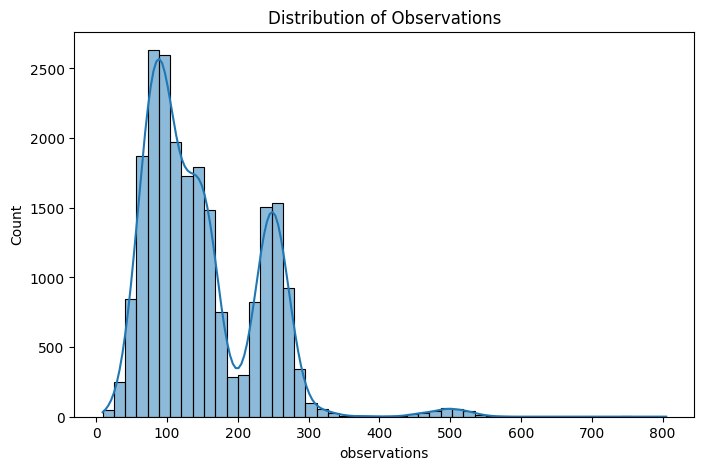

In [126]:
# making the histogram for the observations
plt.figure(figsize=(8, 5), frameon=True)
sns.histplot(data=observations_clean, x='observations', bins=50, kde=True)
plt.title('Distribution of Observations')
plt.show()

In [127]:
# counting the number of observations by park
observationsByPark = observations_clean.groupby('park_name')['observations'].sum().reset_index()
# renaming the column for clarity
observationsByPark.rename(columns={'observations': 'total_observations'}, inplace=True)
observationsByPark.sort_values(by='total_observations', ascending=False, inplace=True)
observationsByPark

,park_name,total_observations
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820


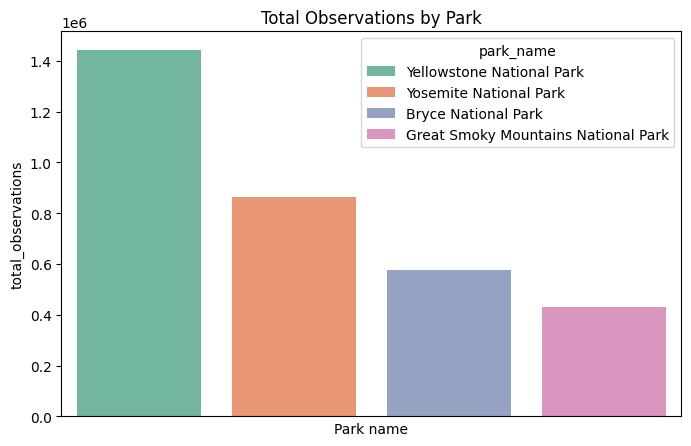

In [128]:
# creating a bar plot for observations by park
plt.figure(figsize=(8, 5), frameon=True)
sns.barplot(data=observationsByPark, x='park_name', y='total_observations', hue='park_name', palette='Set2', legend=True)
plt.title('Total Observations by Park')
plt.xlabel('Park name')
plt.xticks([])
plt.show()

In [129]:
# most observed species
# find the index of the maximum observations for each park
idx = observations_clean.groupby('park_name')['observations'].idxmax() 
# select the rows with the maximum observations
mostObservedSpeciesByPark = observations_clean.loc[idx, ['park_name', 'scientific_name', 'observations']]
mostObservedSpeciesByPark

,park_name,scientific_name,observations
5436,Bryce National Park,Columba livia,339
19973,Great Smoky Mountains National Park,Streptopelia decaocto,256
9810,Yellowstone National Park,Holcus lanatus,805
10223,Yosemite National Park,Hypochaeris radicata,505


In [130]:
# least observed species
# find the index of the min observations for each park
idx = observations_clean.groupby('park_name')['observations'].idxmin() 
# select the rows with the minimum observations
leastObservedSpeciesByPark = observations_clean.loc[idx, ['park_name', 'scientific_name', 'observations']]
leastObservedSpeciesByPark

,park_name,scientific_name,observations
5660,Bryce National Park,Corydalis aurea,9
5421,Great Smoky Mountains National Park,Collomia tinctoria,10
9294,Yellowstone National Park,Grus americana,57
13579,Yosemite National Park,Noturus baileyi,31


### Insights from observations data

The observations dataset contains records of species observed in 4 national parks: Great Smoky Mountains, Bryce, Yosemite, Yellowstone.

The Yellowstone National Park has the highest number of observations, with a total of 1,443,562. The most observed species is Holcus lanatus with 805 observations. The least observed species is Grus americana with 57 observations.

The Great Smoky Mountains National Park has the last number of observations. The total number of observations is 431,820. The Streptopelia decaocto is the most observed species with 256 observations, while the least observed species is Collomia tinctoria with only 10 observations.

### Merging datasets

In [131]:
# merging datasets
df = pd.merge(observations_clean,
              species_drop,
              left_on='scientific_name', 
              right_on='scientific_name',
              how='left')

In [132]:
print(f"The shape of the merged dataset is - {df.shape}")
print()
print(df.info())

The shape of the merged dataset is - (22164, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   scientific_name        22164 non-null  object
 1   park_name              22164 non-null  object
 2   observations           22164 non-null  int64 
 3   category               22164 non-null  object
 4   conservation_status    22164 non-null  object
 5   conservation_priority  22164 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB
None


In [133]:
# filling null values in the 'observations' column with 0
df['observations'] = df['observations'].fillna(0)
# filtering by count observations
filtObservations = df['observations'] < 15
df.loc[filtObservations, :]

,scientific_name,park_name,observations,category,conservation_status,conservation_priority
3221,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Endangered,4
5421,Collomia tinctoria,Great Smoky Mountains National Park,10,Vascular Plant,No Intervention,0
5660,Corydalis aurea,Bryce National Park,9,Vascular Plant,No Intervention,0
9293,Grus americana,Great Smoky Mountains National Park,13,Bird,Endangered,4
12345,Malva moschata,Great Smoky Mountains National Park,14,Vascular Plant,No Intervention,0
13297,Myotis sodalis,Great Smoky Mountains National Park,14,Mammal,Endangered,4
16989,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Endangered,4
18101,Sambucus mexicana,Great Smoky Mountains National Park,12,Vascular Plant,No Intervention,0
18617,Seiurus aurocapilla,Great Smoky Mountains National Park,13,Bird,No Intervention,0
20001,Strix occidentalis,Great Smoky Mountains National Park,11,Bird,No Intervention,0


In [134]:
# agregation information about observations by park
df.groupby(['park_name'])['observations'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
park_name,,,,
Bryce National Park,576025,103.96,9,339
Great Smoky Mountains National Park,431820,77.93,10,256
Yellowstone National Park,1443562,260.52,57,805
Yosemite National Park,863332,155.81,31,505


In [135]:
# creating a dataframe with conservation status species
conservation_species = df.loc[df['conservation_status'].notna(), :]
conservation_species.shape

(22164, 6)

In [136]:
conservation_species.tail()

,scientific_name,park_name,observations,category,conservation_status,conservation_priority
22159,Zygodon viridissimus,Yosemite National Park,159,Nonvascular Plant,No Intervention,0
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102,Nonvascular Plant,No Intervention,0
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102,Nonvascular Plant,No Intervention,0
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237,Nonvascular Plant,No Intervention,0
22163,Zygodon viridissimus var. rupestris,Yosemite National Park,210,Nonvascular Plant,No Intervention,0


In [137]:
# group by park_name and category and sum observations
observations_conservation_species = conservation_species.groupby(['park_name', 'category'])[['observations']] \
    .sum() \
    .unstack() \
    .fillna(0) \
    .astype(int)
observations_conservation_species

observations                        \
category                               Amphibian    Bird   Fish Mammal   
park_name                                                                
Bryce National Park                  7380         51647   12423  20550   
Great Smoky Mountains National Park  5707         37728   9206   15012   
Yellowstone National Park            19440        127251  30574  50795   
Yosemite National Park               11444        76207   18615  30339   

                                                                              
category                            Nonvascular Plant Reptile Vascular Plant  
park_name                                                                     
Bryce National Park                  32992             7950    443083         
Great Smoky Mountains National Park  24857             5691    333619         
Yellowstone National Park            83021             19554   1112927        
Yosemite National Park               49783             11483   665461

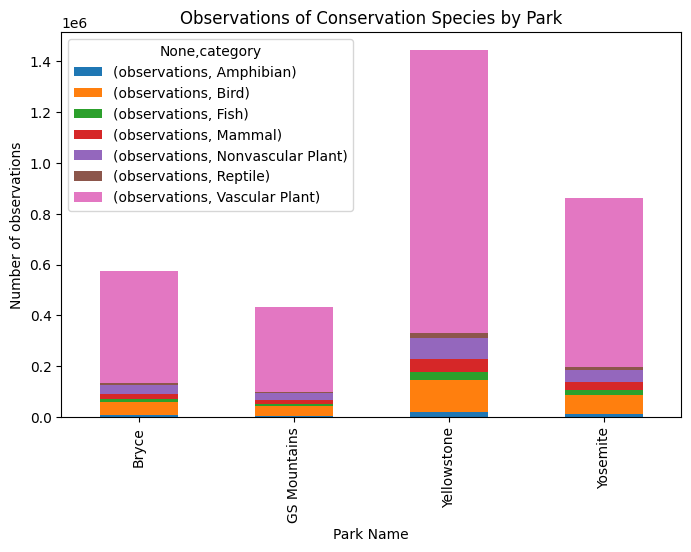

In [138]:
# creating stacked bar plot for number of each category observations by park
observations_conservation_species.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Observations of Conservation Species by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of observations')
plt.xticks(range(4), ['Bryce', 'GS Mountains', 'Yellowstone', 'Yosemite'])
plt.show()

In [139]:
# creating the dataframe for conservation species group by park and count of observations
conservation_species_by_park = conservation_species.groupby(['park_name', 'conservation_status'])['observations'] \
    .sum() \
    .unstack() \
    .fillna(0) \
    .astype(int)

conservation_species_by_park

conservation_status,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,489,258,559762,14925,591
Great Smoky Mountains National Park,334,189,420543,10314,440
Yellowstone National Park,1228,559,1404527,35789,1459
Yosemite National Park,747,386,839799,21551,849


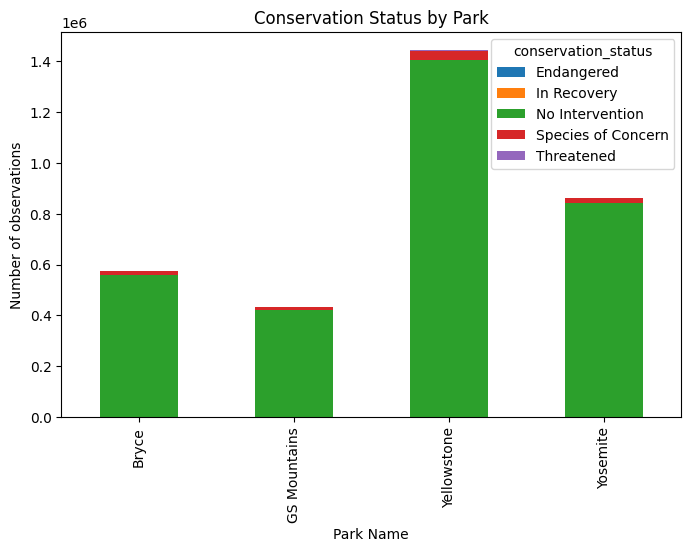

In [140]:
# creating stacked bar plot for conservation status by park
conservation_species_by_park.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Conservation Status by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of observations')
plt.xticks(range(4), ['Bryce', 'GS Mountains', 'Yellowstone', 'Yosemite'])
plt.show()

## Conclusions

In this project, the author analyzed the biodiversity of species in four U.S. national parks.
During the process, they applied key data analysis and visualization techniques using Python libraries such as pandas, matplotlib, and seaborn.
Specifically, the work included:

- reading and inspecting datasets;
- cleaning data by detecting and removing duplicates;
- grouping data by various parameters;
- combining datasets with .merge;
- reshaping data using .unstack;
- visualizing results through bar plots and histograms.

next question:
- Are the results what you expected?
- What are the key findings and takeaways?